# Regresión Lineal

Bienvenido a mis notas del módulo 2 de regresión lineal del diplomado de Data Scientist de Skills for Industry

In [1]:
# importamos pandas, que es nuestra librería para manipular nuestros datos
import pandas as pd

In [2]:
location_data = pd.read_csv('location_rev.csv')

In [3]:
location_data.head()

revenue  num_competitors  median_income  num_loyalty_members  \
0  42247.80              3.0       30527.57               1407.0   
1  38628.37              3.0       30185.49               1025.0   
2  39715.16              1.0       32182.24               1498.0   
3  35593.30              5.0       29728.65               2340.0   
4  35128.18              4.0       30691.17                847.0   

   population_density  location_age  
0              3302.0          12.0  
1              4422.0          11.0  
2              3260.0          12.0  
3              4325.0          10.0  
4              3774.0          11.0

In [4]:
location_data.describe()

revenue  num_competitors  median_income  num_loyalty_members  \
count   1000.000000      1000.000000    1000.000000          1000.000000   
mean   38433.469330         3.397000   31360.668500          1597.200000   
std    11665.825242         1.016082    3943.278358           496.874663   
min     5000.000000         0.000000   20000.000000             0.000000   
25%    30277.897500         3.000000   28792.592500          1253.000000   
50%    38323.095000         3.000000   31134.555000          1605.000000   
75%    45894.670000         4.000000   34050.992500          1925.250000   
max    79342.070000         7.000000   43676.900000          3280.000000   

       population_density  location_age  
count         1000.000000   1000.000000  
mean          3351.199000     11.041000  
std            975.664263      3.034885  
min              0.000000      0.000000  
25%           2689.250000      9.000000  
50%           3353.000000     11.000000  
75%           4017.000000     13.000000  
max           6489.000000     24.000000

In [5]:
location_data.tail()

revenue  num_competitors  median_income  num_loyalty_members  \
995  46689.11              3.0       28278.48                961.0   
996  34826.87              4.0       27801.73               1914.0   
997  28618.06              3.0       35481.50               1294.0   
998  40226.41              4.0       29218.30               1932.0   
999  39093.23              4.0       34785.80               2803.0   

     population_density  location_age  
995              3335.0          16.0  
996              2507.0          14.0  
997              1731.0          10.0  
998              4410.0          13.0  
999              4270.0           8.0

In [6]:
location_data.isnull().sum()

revenue                0
num_competitors        0
median_income          0
num_loyalty_members    0
population_density     0
location_age           0
dtype: int64

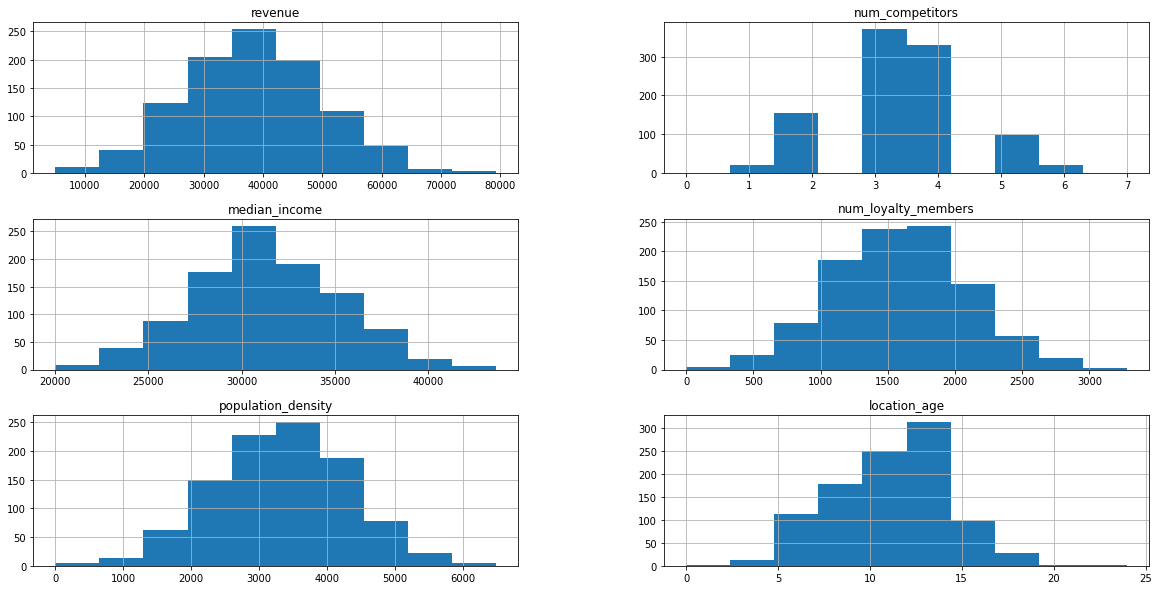

In [7]:
location_data.hist(figsize = (20, 10));

## Pruebas estadísticas

In [8]:
from scipy.stats import kstest, normaltest

In [9]:
kstest(location_data['population_density'], 'norm', args =(location_data['population_density'].mean(), location_data['population_density'].std()))

KstestResult(statistic=0.013501098580180781, pvalue=0.9921770275854719)

In [10]:
kstest((location_data['population_density'] -  location_data['population_density'].mean()) / location_data['population_density'].std(), 'norm', N=1000)

KstestResult(statistic=0.013501098580180781, pvalue=0.9921770275854719)

In [11]:
normaltest(location_data['population_density']) #D’Agostino and Pearson’s

NormaltestResult(statistic=0.21650440503166507, pvalue=0.897401241037234)

In [12]:
location_data.shape

(1000, 6)

In [13]:
location_data.keys()

Index(['revenue', 'num_competitors', 'median_income', 'num_loyalty_members',
       'population_density', 'location_age'],
      dtype='object')

In [14]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   revenue              1000 non-null   float64
 1   num_competitors      1000 non-null   float64
 2   median_income        1000 non-null   float64
 3   num_loyalty_members  1000 non-null   float64
 4   population_density   1000 non-null   float64
 5   location_age         1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [15]:
location_data.corr()

revenue  num_competitors  median_income  \
revenue              1.000000        -0.156685       0.601888   
num_competitors     -0.156685         1.000000      -0.018398   
median_income        0.601888        -0.018398       1.000000   
num_loyalty_members  0.173432        -0.027283       0.011891   
population_density   0.311653         0.035768      -0.041697   
location_age         0.552773         0.053796       0.045621   

                     num_loyalty_members  population_density  location_age  
revenue                         0.173432            0.311653      0.552773  
num_competitors                -0.027283            0.035768      0.053796  
median_income                   0.011891           -0.041697      0.045621  
num_loyalty_members             1.000000           -0.028611      0.036016  
population_density             -0.028611            1.000000     -0.009977  
location_age                    0.036016           -0.009977      1.000000

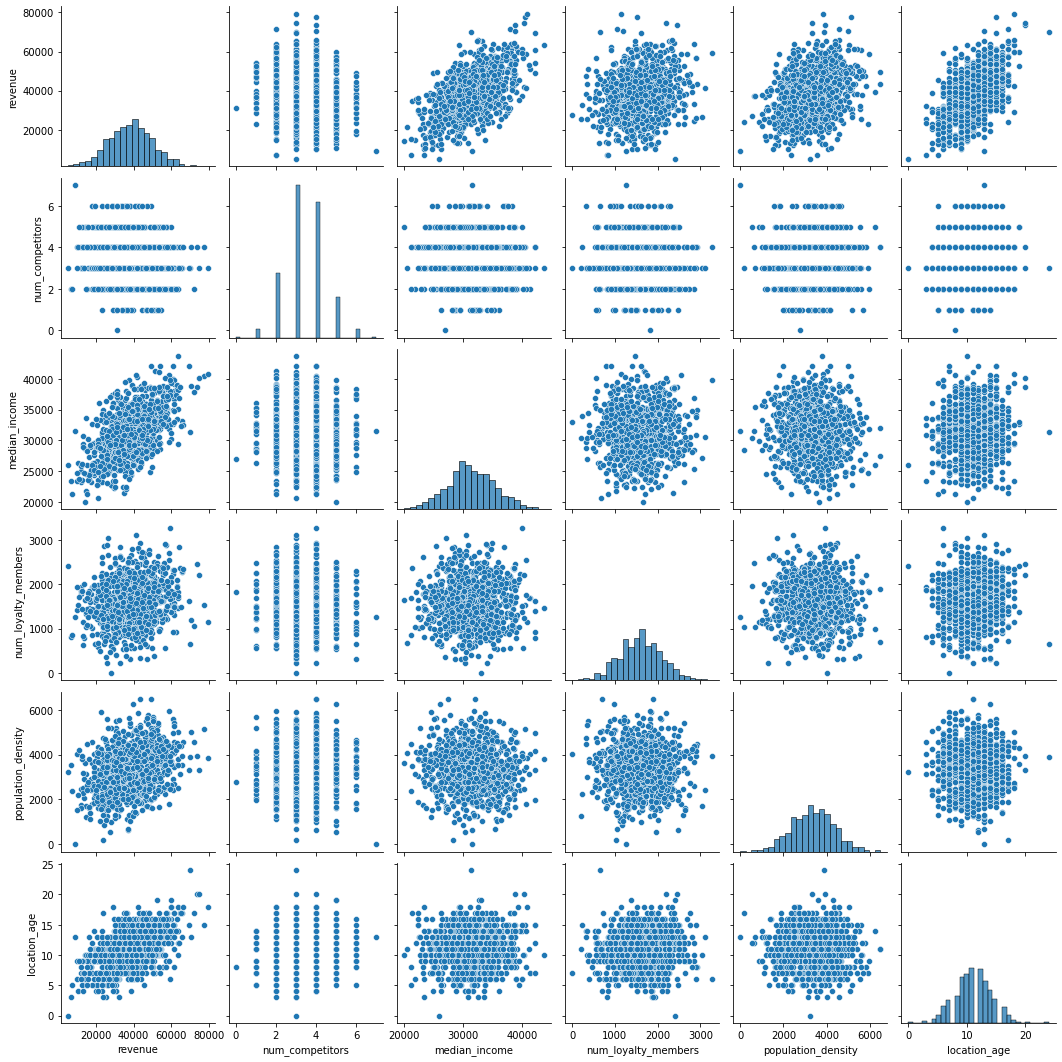

In [16]:
import seaborn as sns
sns.pairplot(location_data)

In [17]:
X = location_data[['num_competitors','median_income','num_loyalty_members','population_density','location_age']]
y = location_data['revenue']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [21]:
model.intercept_

-51068.63644236374

In [22]:
single_location = pd.DataFrame({
    'num_competitors': [3],
    'median_income': [30000],
    'num_loyalty_members': [1200],
    'population_density': [2000],
    'location_age': [10]
})

model.predict(single_location)

array([27573.21782447])

In [23]:
X.mean()

num_competitors            3.3970
median_income          31360.6685
num_loyalty_members     1597.2000
population_density      3351.1990
location_age              11.0410
dtype: float64

C:\Users\dnmartinezg\AppData\Local\Temp\ipykernel_53864\2436424029.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 100000], [0, 100000], 'k-', color = 'r')


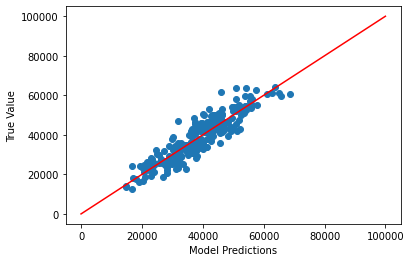

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'r')
plt.show()

La regresión lineal no va a ser precisa al  100%, estamos trabajando con intervalos para la predicción. 

Este modelo es usado comúnmente para trabajar proyectos de optimización. 

In [26]:
from scipy.stats.stats import pearsonr

pearsonr(model.predict(X_test),y_test)

C:\Users\dnmartinezg\AppData\Local\Temp\ipykernel_53864\2875124279.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


(0.9061597827907564, 1.1552714895195607e-94)

INTERPRETACIÓN: El coeficiente de pearson nos va a dar la precisión de la predicción que nos da el modelo. El resultado "perfecto" es 1

Error al cuadrado, este valor debe ser lo más cercano a 1 posible.

In [27]:
pearsonr(model.predict(X_test),y_test)[0]**2

0.8211255519473908